# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [136]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [137]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [138]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [139]:
# En esta celda cargá el regresor y realizá el entrenamiento

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [140]:
# Acá realizá la predicción

y_pred = tree.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [141]:
# En esta celda calculá el rmse

from sklearn.metrics import mean_squared_error

tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
print('Mean Squared Error: ', tree_mse)
print('Root Mean Squared Error: ', tree_rmse)

Mean Squared Error:  630603684.758846
Root Mean Squared Error:  25111.82360480509


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [142]:
values = [5,10,15,20,25,30,35,40,45,50] # Creamos una lista con los diferentes valores a iterar
rmses_train =[] # Creamos lista vacia de root mean square error para train
rmses_test =[] # Creamos lista vacia de root mean square error para test

for i in values:
    trees = DecisionTreeRegressor(max_depth=i) # Iteramos sobre la lista de valores que va a tomar el parametro
    trees.fit(X_train, y_train) # Entrenamos los arboles
    y_train_pred = trees.predict(X_train) # Predecimos sobre datos de entrenamiento
    y_test_pred = trees.predict(X_test) # Predecimos sobre datos de testing
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) # Calculamos root mean square error en train
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) # Calculamos root mean square error en test
    rmses_train.append(rmse_train) # Añadimos los valores de rmse a la lista vacia de rmse para train
    rmses_test.append(rmse_test) # Añadimos los valores de rmse a la lista vacia de rmse para test

print('Root Mean Squared Errors Train : \n', rmses_train)
print('Root Mean Squared Erros Test : \n', rmses_test)

Root Mean Squared Errors Train : 
 [21170.403344931623, 15507.091906682095, 7915.433190256811, 2468.55925810657, 675.9552664115744, 526.3339719538154, 526.3339719538154, 526.3339719538154, 526.3339719538154, 526.3339719538154]
Root Mean Squared Erros Test : 
 [22247.803452301796, 21629.669002713592, 24258.226518163003, 24929.27659225299, 25148.775029485405, 25270.301896916753, 24996.727212151265, 25147.233171282172, 25259.59846020662, 25104.315400373893]


In [143]:
np.reshape(rmses_train, (10,))
np.reshape(rmses_test, (10,))

array([22247.8034523 , 21629.66900271, 24258.22651816, 24929.27659225,
       25148.77502949, 25270.30189692, 24996.72721215, 25147.23317128,
       25259.59846021, 25104.31540037])

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

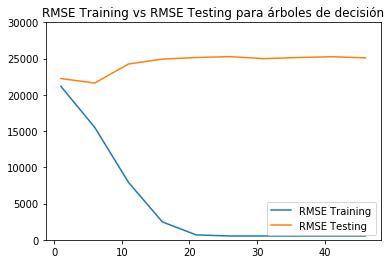

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,50, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,50, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [145]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda

from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 3
clf = KNeighborsRegressor(n_neighbors=n_neighbors) # Creamos el clasificador con 3 vecinos como parametro

In [102]:
# En esta celda usamos Label Encoder para evitar el Value Error: Unkown label type 'continuous'

#from sklearn.preprocessing import LabelEncoder
#from sklearn import utils

#lab_enc = LabelEncoder()
#y_train = lab_enc.fit_transform(y_train)
#print(y_train)
#print(utils.multiclass.type_of_target(y_train))
#print(utils.multiclass.type_of_target(y_train.astype('int')))
#print(utils.multiclass.type_of_target(y_train))

In [146]:
clf.fit(X_train, y_train) # Entrenamos el regresor

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [148]:
clf_mse = mean_squared_error(y_test, y_pred) # Calcuamos mean squared error en test data
clf_rmse = np.sqrt(tree_mse) # Calculamos root mean squared error en test data
print('Mean Squared Error: ', clf_mse)
print('Root Mean Squared Error: ', clf_rmse)

Mean Squared Error:  630603684.758846
Root Mean Squared Error:  25111.82360480509


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [149]:
# Calculá los cambio en el rmse en esta celda

n_neighbors = np.arange(1,30,1) # Creamos una lista con los diferentes valores del parametro n_neighbors a iterar
rmses_train =[] # Creamos lista vacia de root mean square error para train
rmses_test =[] # Creamos lista vacia de root mean square error para test

for i in n_neighbors:
    clfs = KNeighborsRegressor(n_neighbors=i) # Iteramos sobre la lista de valores que va a tomar el parametro
    clfs.fit(X_train, y_train) # Entrenamos los clasificadores
    y_train_pred = clfs.predict(X_train) # Predecimos sobre datos de entrenamiento
    y_test_pred = clfs.predict(X_test) # Predecimos sobre datos de testing
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred)) # Calculamos root mean square error en train
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred)) # Calculamos root mean square error en test
    rmses_train.append(rmse_train) # Añadimos los valores de rmse a la lista vacia de rmse para train
    rmses_test.append(rmse_test) # Añadimos los valores de rmse a la lista vacia de rmse para test

print('Root Mean Squared Errors Train : \n', rmses_train)
print('Root Mean Squared Erros Test : \n', rmses_test)

Root Mean Squared Errors Train : 
 [717.7083160050084, 13746.009016313237, 16557.178260577828, 17829.292761243214, 18751.379229464594, 19293.814806681385, 19794.717263196573, 20139.78742144739, 20468.656317131932, 20701.786822437127, 20912.32302589446, 21139.143085959997, 21272.332798820524, 21364.85500145764, 21441.85527550086, 21573.81242697147, 21670.194530916495, 21772.495151896972, 21860.188681197473, 21967.906130450498, 22062.75264160703, 22142.01003813332, 22232.704205317248, 22302.815306185767, 22392.327817968937, 22470.937588548288, 22526.678661609505, 22566.54520745387, 22623.424659205648]
Root Mean Squared Erros Test : 
 [26314.375047026846, 24378.43157503682, 23324.776048948213, 23028.274549889524, 22733.040368844526, 22731.27025782464, 22620.31310691122, 22634.689482726375, 22608.863498855015, 22568.211996792175, 22479.91578951748, 22442.04603011599, 22457.046840823732, 22566.696958539993, 22566.465187327743, 22525.328717065153, 22483.195042198382, 22497.920299301164, 2252

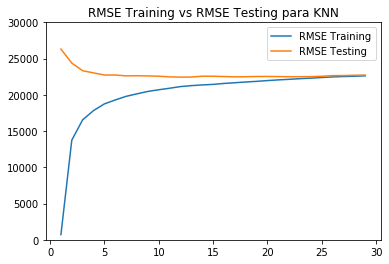

In [150]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [151]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [152]:
# Calculá en esta celda los cross_val_score

from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor()
score = cross_val_score(regressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=5)
rmse_scores = nmsq2rmse(score)
print('Scores :', rmse_scores)
print('Promedio :', rmse_scores.mean())

Scores : [25490.4476678  24627.53384073 25620.84049429 24556.44631123
 26155.69865615 27758.45868339 27217.18103422 25941.88045418
 25739.95852958 25939.62339214]
Promedio : 25904.806906372527


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [153]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [154]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [155]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,80000.000,139000.000,59000.000
1,128000.000,144000.000,16000.000
2,150000.000,162000.000,12000.000
3,85000.000,110000.000,25000.000
4,135000.000,110000.000,25000.000
5,135000.000,72000.000,63000.000
6,68000.000,75000.000,7000.000
7,110000.000,165000.000,55000.000
8,134000.000,168000.000,34000.000
9,110000.000,73000.000,37000.000
